In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

In [3]:
df.head(5)

,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,Acute Hospitals,12025,11830,11704,11545,11321,10826,10340,10318,9844,9262,8939,8725,8304,8249,8289,8190,8235,8187
1,Public,9956,9820,9762,9610,9404,9071,8623,8561,8128,7652,7377,7170,6925,6871,6416,6255,6304,6256
2,Not-For-Profit,347,273,270,285,288,273,271,316,316,283,283,283,283,283,303,303,303,303
3,Private,1722,1737,1672,1650,1629,1482,1446,1441,1400,1327,1279,1272,1096,1095,1570,1632,1628,1628
4,Psychiatric Hospitals,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,2010,2010,2010,2010,2040,2064,2064,2113


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DataSeries  20 non-null     object
 1   2023        20 non-null     int64 
 2   2022        20 non-null     int64 
 3   2021        20 non-null     int64 
 4   2020        20 non-null     int64 
 5   2019        20 non-null     object
 6   2018        20 non-null     object
 7   2017        20 non-null     object
 8   2016        20 non-null     object
 9   2015        20 non-null     object
 10  2014        20 non-null     object
 11  2013        20 non-null     object
 12  2012        20 non-null     object
 13  2011        20 non-null     object
 14  2010        20 non-null     object
 15  2009        20 non-null     object
 16  2008        20 non-null     object
 17  2007        20 non-null     object
 18  2006        20 non-null     object
dtypes: int64(4), object(15)
memory usage: 3.1+ KB


In [5]:
df.describe()

,2023,2022,2021,2020
count,20.000000,20.000000,20.000000,20.000000
mean,3576.300000,3439.500000,3299.300000,3203.800000
std,5164.816439,4952.693085,4728.398606,4540.937656
min,0.000000,0.000000,0.000000,0.000000
25%,181.000000,166.000000,166.000000,159.750000
50%,1526.500000,1481.500000,1392.000000,1390.000000
75%,4894.000000,4483.500000,4443.750000,4391.000000
max,19201.000000,18157.000000,17064.000000,16221.000000


In [15]:
df.columns


Index(['DataSeries', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006'],
      dtype='object')

In [20]:
import pandas as pd

# 1. Read the CSV 
df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

# 2. Keep only the row for total beds
#    Adjust the text below to exactly match what you see in df["dataseries"].unique()
beds_row = df[df["DataSeries"] == "Beds in inpatient facilities"].copy()

# 3. Convert from wide (years as columns) to long (year, beds)
beds_long = beds_row.melt(
    id_vars=["DataSeries"],   # keep this column as is
    var_name="year",          # new column for former column names (years)
    value_name="beds"         # new column for values
)

# 4. Convert year and beds to numeric
beds_long["year"] = pd.to_numeric(beds_long["year"], errors="coerce")
beds_long["beds"] = pd.to_numeric(beds_long["beds"], errors="coerce")

# 5. Drop rows where year or beds is missing, sort by year
beds_long = beds_long.dropna(subset=["year", "beds"]).sort_values("year")

# 6. Set year as the index (good for time series)
beds_long = beds_long.set_index("year")

beds_long.head()


,DataSeries,beds
year,,


In [21]:
print(beds_long.head())
print(beds_long.tail())

Empty DataFrame
Columns: [DataSeries, beds]
Index: []
Empty DataFrame
Columns: [DataSeries, beds]
Index: []


In [18]:
import pandas as pd

# Load your CSV
df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

# Pick one series, e.g. Acute Hospitals
beds_row = df[df["DataSeries"] == "Acute Hospitals"].copy()

# Reshape from wide to long
beds_long = beds_row.melt(
    id_vars=["DataSeries"],
    var_name="year",
    value_name="beds"
)

# Clean types
beds_long["year"] = pd.to_numeric(beds_long["year"], errors="coerce")
beds_long["beds"] = pd.to_numeric(beds_long["beds"], errors="coerce")

# Drop missing and sort
beds_long = beds_long.dropna(subset=["year", "beds"]).sort_values("year")

# Set year as index
beds_long = beds_long.set_index("year")
print(beds_long.head())
# table is neat, each row is one year, and can plot or analyse the trend. Code reshapes from wide to long format
# it then cleans the nos and drops missing values and sorts and sets year as the index.

           DataSeries  beds
year                       
2006  Acute Hospitals  8187
2007  Acute Hospitals  8235
2008  Acute Hospitals  8190
2009  Acute Hospitals  8289
2010  Acute Hospitals  8249


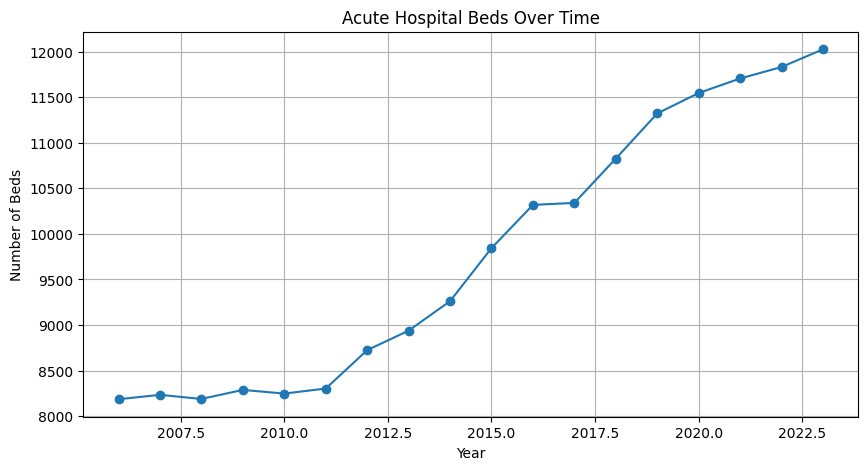

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(beds_long.index, beds_long["beds"], marker="o")
plt.title("Acute Hospital Beds Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Beds")
plt.grid(True)
plt.show()

In [26]:
print(beds_long.columns)


Index(['DataSeries', 'beds'], dtype='object')


In [29]:
print(beds_long.shape)
print(beds_long.head())
print(beds_long["beds"].isna().sum())


(0, 2)
Empty DataFrame
Columns: [DataSeries, beds]
Index: []
0


In [30]:
df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")
print(df.columns)
print(df.head())
print(df["DataSeries"].unique())


Index(['DataSeries', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006'],
      dtype='object')
              DataSeries   2023   2022   2021   2020   2019   2018   2017  \
0        Acute Hospitals  12025  11830  11704  11545  11321  10826  10340   
1                 Public   9956   9820   9762   9610   9404   9071   8623   
2         Not-For-Profit    347    273    270    285    288    273    271   
3                Private   1722   1737   1672   1650   1629   1482   1446   
4  Psychiatric Hospitals   1950   1950   1950   1950   1950   1950   1950   

    2016  2015  2014  2013  2012  2011  2010  2009  2008  2007  2006  
0  10318  9844  9262  8939  8725  8304  8249  8289  8190  8235  8187  
1   8561  8128  7652  7377  7170  6925  6871  6416  6255  6304  6256  
2    316   316   283   283   283   283   283   303   303   303   303  
3   1441  1400  1327  1279  1272  1096  1095  1570 

In [28]:
len(y)   # is 0


0

In [31]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

# 1) Check actual series name
print(df["DataSeries"].unique())

# 2) Use the exact value shown above
beds_row = df[df["DataSeries"] == "Beds in inpatient facilities"].copy()

# 3) Wide -> long
beds_long = beds_row.melt(
    id_vars=["DataSeries"],
    var_name="year",
    value_name="beds"
)

# 4) Clean
beds_long["year"] = pd.to_numeric(beds_long["year"], errors="coerce")
beds_long["beds"] = pd.to_numeric(beds_long["beds"], errors="coerce")
beds_long = beds_long.dropna(subset=["year", "beds"]).sort_values("year")
beds_long = beds_long.set_index("year")

print(beds_long.shape)   # should be > 0
print(beds_long.head())

# 5) Only fit if we have data
y = beds_long["beds"].astype("float64")

if len(y) > 5:
    model = ARIMA(y, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)
    print(forecast)
else:
    print("Not enough data points to fit ARIMA. Length:", len(y))


['Acute Hospitals' '    Public' '    Not-For-Profit' '    Private'
 'Psychiatric Hospitals' 'Community Hospitals' 'Nursing Homes'
 'Inpatient Hospice Palliative Care Service (IHPCS)']
(0, 2)
Empty DataFrame
Columns: [DataSeries, beds]
Index: []
Not enough data points to fit ARIMA. Length: 0


In [32]:
 #Choose one series that exists, e.g. "Acute Hospitals"
beds_row = df[df["DataSeries"] == "Acute Hospitals"].copy()

# 4. Convert wide -> long (years -> one column)
beds_long = beds_row.melt(
    id_vars=["DataSeries"],
    var_name="year",
    value_name="beds"
)

# 5. Clean types
beds_long["year"] = pd.to_numeric(beds_long["year"], errors="coerce")
beds_long["beds"] = pd.to_numeric(beds_long["beds"], errors="coerce")
beds_long = beds_long.dropna(subset=["year", "beds"]).sort_values("year")
beds_long = beds_long.set_index("year")

print(beds_long.shape)
print(beds_long.head())

(18, 2)
           DataSeries  beds
year                       
2006  Acute Hospitals  8187
2007  Acute Hospitals  8235
2008  Acute Hospitals  8190
2009  Acute Hospitals  8289
2010  Acute Hospitals  8249


In [33]:
y = beds_long["beds"].astype("float64")

model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)
print(forecast)


18    12181.121741
19    12322.707935
20    12451.111900
21    12567.560953
22    12673.168143
Name: predicted_mean, dtype: float64


C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [34]:
# Sum all facility types per year
df_sum = df.set_index("DataSeries").loc[
    ['Acute Hospitals', 'Psychiatric Hospitals',
     'Community Hospitals', 'Nursing Homes',
     'Inpatient Hospice Palliative Care Service (IHPCS)']
]

beds_long = df_sum.sum(axis=0).reset_index()
beds_long.columns = ["year", "beds"]

beds_long["year"] = pd.to_numeric(beds_long["year"], errors="coerce")
beds_long["beds"] = pd.to_numeric(beds_long["beds"], errors="coerce")
beds_long = beds_long.dropna().set_index("year").sort_index()

# then ARIMA on beds_long["beds"]


In [35]:
# After wide -> long
# beds_long index = year, column = beds
y = beds_long["beds"].astype("float64")

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)


C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [36]:
import pandas as pd

# Create year index for forecast
last_year = y.index.max()
future_years = range(last_year + 1, last_year + 1 + len(forecast))

forecast.index = future_years  # label forecast with future years

# Combine into one series
combined = pd.concat([y, forecast])


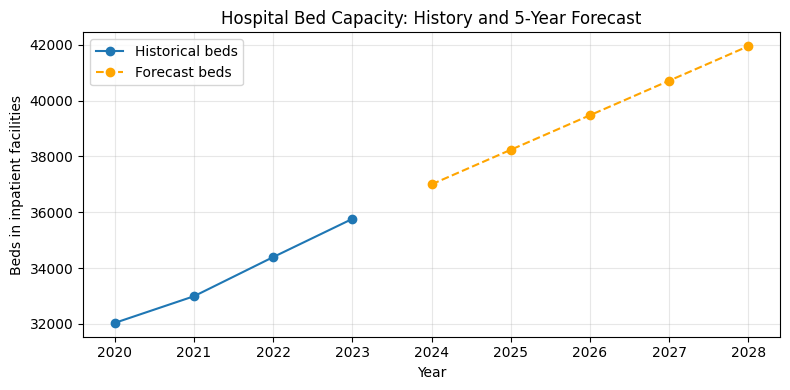

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Historical
plt.plot(y.index, y.values, label="Historical beds", marker="o")

# Forecast
plt.plot(forecast.index, forecast.values, label="Forecast beds", marker="o", linestyle="--", color="orange")

plt.xlabel("Year")
plt.ylabel("Beds in inpatient facilities")
plt.title("Hospital Bed Capacity: History and 5‑Year Forecast")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [38]:
!pip install Prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.3.0-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.3.0-py3-none-win_amd64.whl (12.1 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\rupal\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\prophet\\stan_model\\cmdstan-2.37.0\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\rupal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing plotly failed. Interactive plots will not work.
16:43:57 - cmdstanpy - INFO - Chain [1] start processing
16:43:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


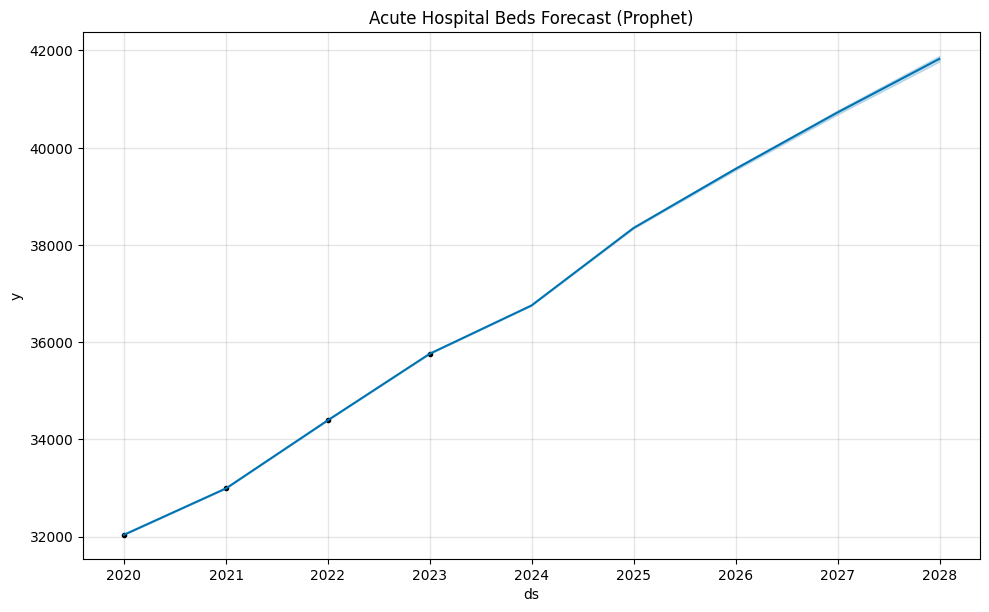

In [39]:
from prophet import Prophet

# Prophet expects columns 'ds' (date) and 'y' (value)
prophet_df = beds_long.reset_index().rename(columns={"year":"ds","beds":"y"})
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"], format="%Y")

model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=5, freq="Y")
forecast = model.predict(future)

model.plot(forecast)
plt.title("Acute Hospital Beds Forecast (Prophet)")
plt.show()

In [40]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\rupal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
#lets do for all hospitals 
# load and reshape all series
import pandas as pd

# Load CSV
df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

# Function to reshape one series
def reshape_series(series_name):
    row = df[df["DataSeries"] == series_name].copy()
    long = row.melt(id_vars=["DataSeries"], var_name="year", value_name="beds")
    long["year"] = pd.to_numeric(long["year"], errors="coerce")
    long["beds"] = pd.to_numeric(long["beds"], errors="coerce")
    long = long.dropna(subset=["year","beds"]).sort_values("year")
    long = long.set_index("year")
    return long["beds"]

# Apply to each hospital type
acute = reshape_series("Acute Hospitals")
psych = reshape_series("Psychiatric Hospitals")
community = reshape_series("Community Hospitals")
nursing = reshape_series("Nursing Homes")
ihpcs = reshape_series("Inpatient Hospice Palliative Care Service (IHPCS)")

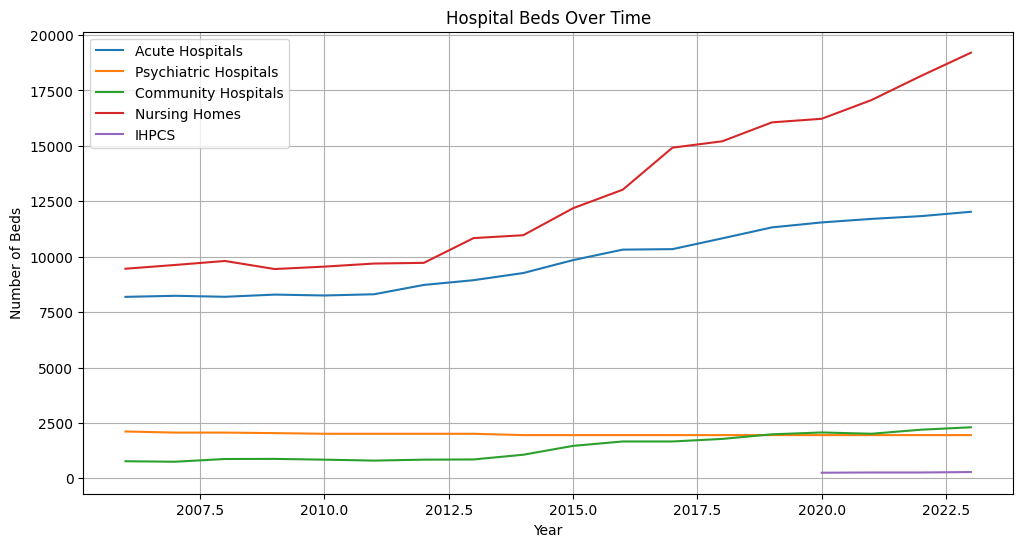

In [43]:
# Step 2 : plot each series 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(acute.index, acute, label="Acute Hospitals")
plt.plot(psych.index, psych, label="Psychiatric Hospitals")
plt.plot(community.index, community, label="Community Hospitals")
plt.plot(nursing.index, nursing, label="Nursing Homes")
plt.plot(ihpcs.index, ihpcs, label="IHPCS")
plt.title("Hospital Beds Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Beds")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
#Step 3: Forecast each series (ARIMA example)
from statsmodels.tsa.arima.model import ARIMA

def forecast_series(series, steps=5):
    model = ARIMA(series, order=(1,1,1))
    fit = model.fit()
    forecast = fit.forecast(steps=steps)
    return forecast

acute_forecast = forecast_series(acute)
psych_forecast = forecast_series(psych)
community_forecast = forecast_series(community)
nursing_forecast = forecast_series(nursing)
ihpcs_forecast = forecast_series(ihpcs)

C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [45]:
# Step 4 Combine into total beds forecast
# Historical total
total = acute + psych + community + nursing + ihpcs

# Forecast total (sum of forecasts)
total_forecast = acute_forecast + psych_forecast + community_forecast + nursing_forecast + ihpcs_forecast

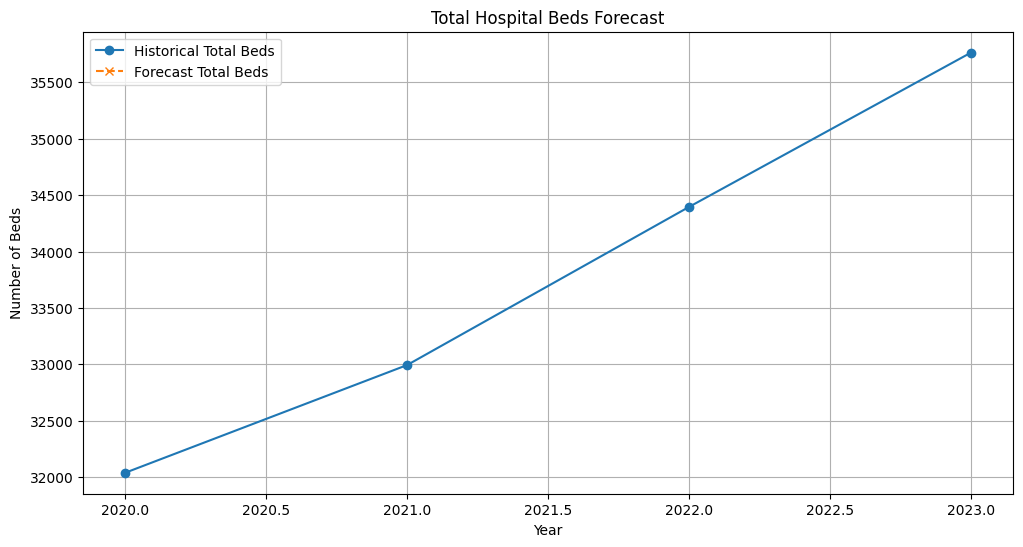

In [46]:
# Step 5 : visualise combined forecast 
plt.figure(figsize=(12,6))
plt.plot(total.index, total, label="Historical Total Beds", marker="o")
plt.plot(range(total.index[-1]+1, total.index[-1]+1+len(total_forecast)), 
         total_forecast, label="Forecast Total Beds", marker="x", linestyle="--")
plt.title("Total Hospital Beds Forecast")
plt.xlabel("Year")
plt.ylabel("Number of Beds")
plt.legend()
plt.grid(True)
plt.show()

 Summary:
• 	We reshaped each hospital type into a tidy time series.
• 	We plotted them individually.
• 	We applied ARIMA forecasting to each.
• 	We summed them to get a total forecast across all hospitals.
• 	Finally, we visualized the combined forecast.


Lets extend the workflow to Prophet forecasting , especially good for time series forecasting 

In [47]:
# Reshape each hospital series
from prophet import Prophet
import pandas as pd

df = pd.read_csv("C:/Users/rupal/Downloads/BedsInInpatientFacilitiesAnnual.csv")

def reshape_for_prophet(series_name):
    row = df[df["DataSeries"] == series_name].copy()
    long = row.melt(id_vars=["DataSeries"], var_name="year", value_name="beds")
    long["year"] = pd.to_numeric(long["year"], errors="coerce")
    long["beds"] = pd.to_numeric(long["beds"], errors="coerce")
    long = long.dropna(subset=["year","beds"]).sort_values("year")
    # Prophet expects 'ds' (date) and 'y' (value)
    prophet_df = long.rename(columns={"year":"ds","beds":"y"})
    prophet_df["ds"] = pd.to_datetime(prophet_df["ds"], format="%Y")
    return prophet_df

In [48]:
# Step 2 : Forecast each hospital series
def forecast_prophet(prophet_df, steps=5):
    model = Prophet(yearly_seasonality=True)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=steps, freq="Y")
    forecast = model.predict(future)
    return forecast

In [49]:
# Apply to each hospital type
acute_df = reshape_for_prophet("Acute Hospitals")
psych_df = reshape_for_prophet("Psychiatric Hospitals")
community_df = reshape_for_prophet("Community Hospitals")
nursing_df = reshape_for_prophet("Nursing Homes")
ihpcs_df = reshape_for_prophet("Inpatient Hospice Palliative Care Service (IHPCS)")

acute_forecast = forecast_prophet(acute_df)
psych_forecast = forecast_prophet(psych_df)
community_forecast = forecast_prophet(community_df)
nursing_forecast = forecast_prophet(nursing_df)
ihpcs_forecast = forecast_prophet(ihpcs_df)

16:44:55 - cmdstanpy - INFO - Chain [1] start processing
16:44:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:44:55 - cmdstanpy - INFO - Chain [1] start processing
16:44:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:44:56 - cmdstanpy - INFO - Chain [1] start processing
16:44:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5

16:44:59 - cmdstanpy - INFO - Chain [1] start processing
16:44:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


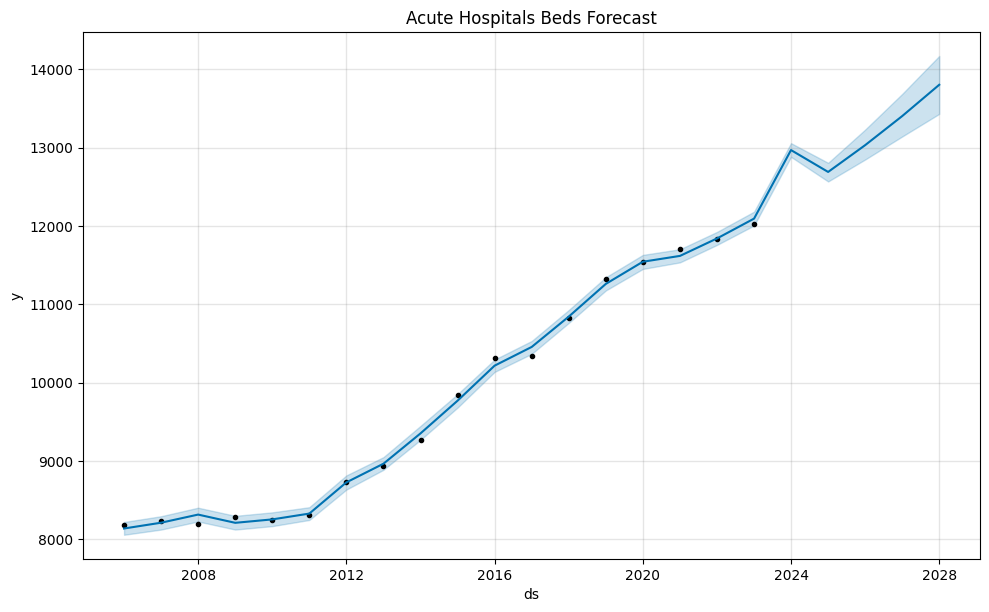

16:44:59 - cmdstanpy - INFO - Chain [1] start processing
16:44:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


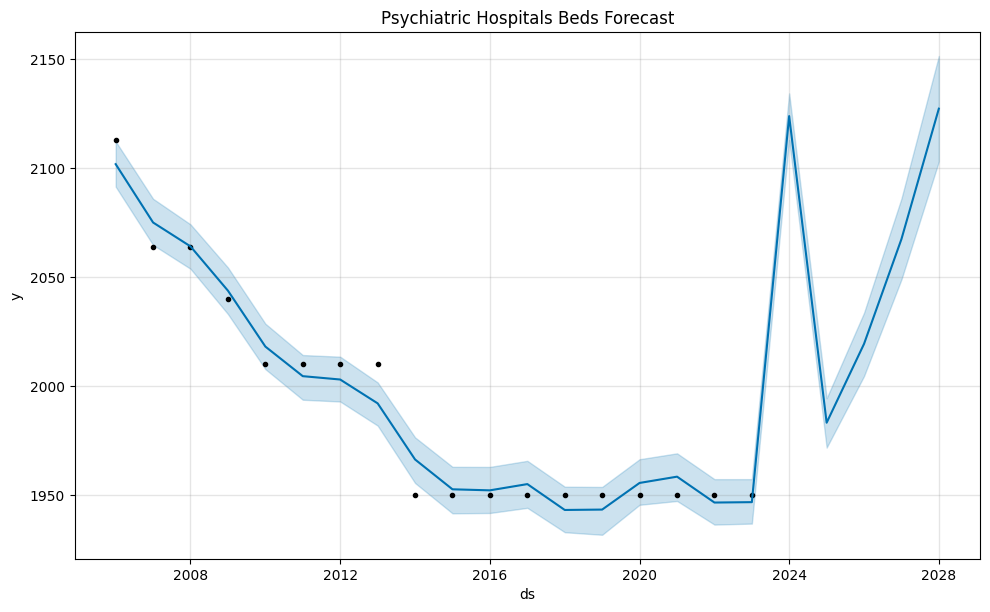

16:45:00 - cmdstanpy - INFO - Chain [1] start processing
16:45:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


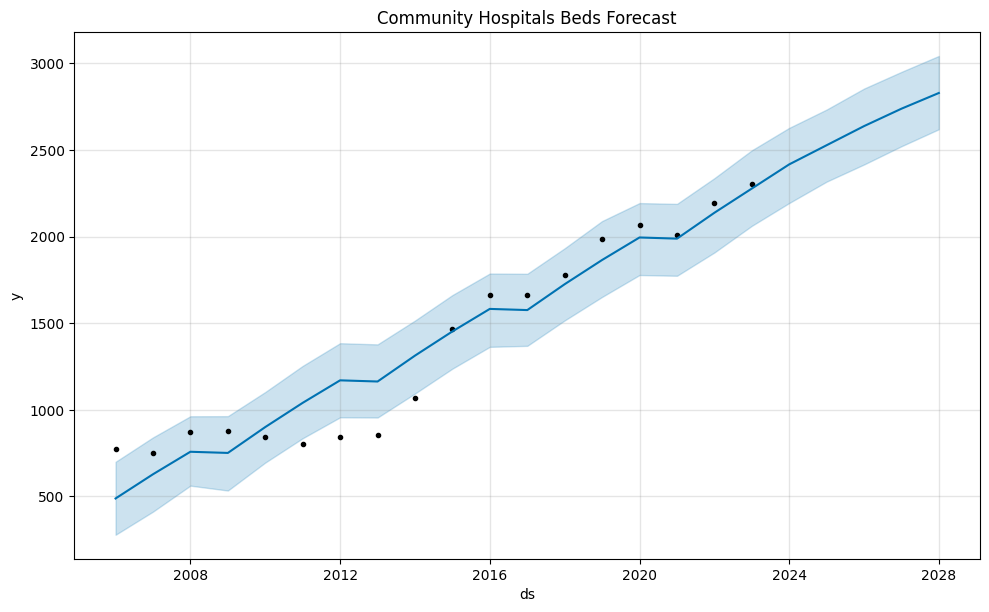

16:45:00 - cmdstanpy - INFO - Chain [1] start processing
16:45:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


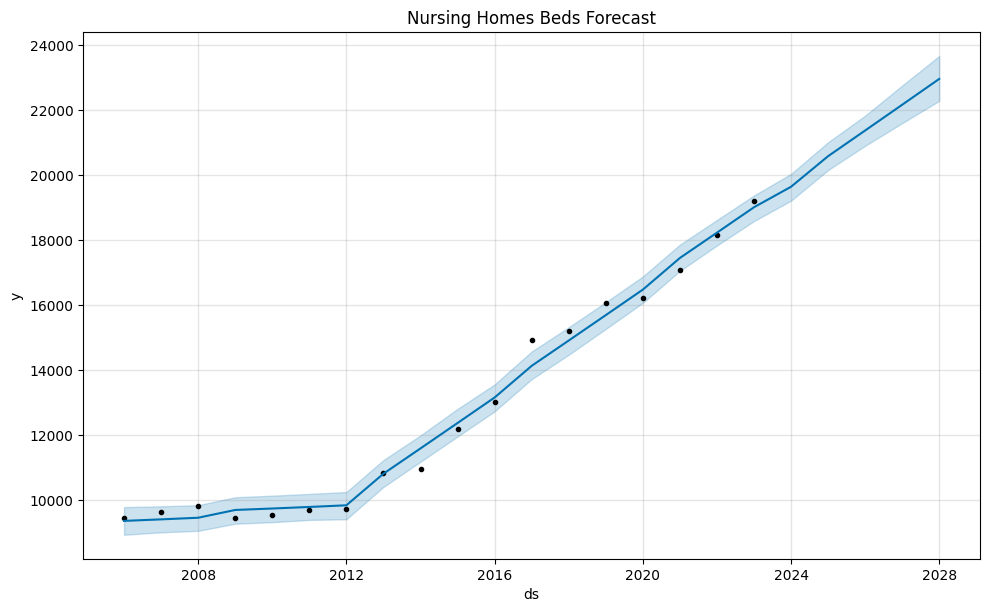

16:45:00 - cmdstanpy - INFO - Chain [1] start processing
16:45:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


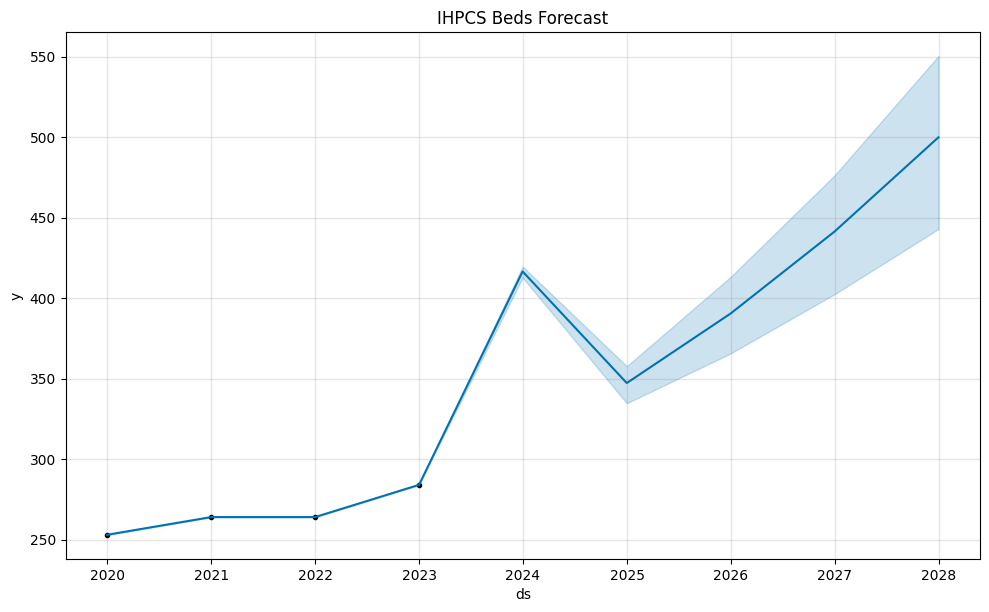

In [50]:
#Step 3 : Visualise individual forecast
import matplotlib.pyplot as plt

for name, df, forecast in [
    ("Acute Hospitals", acute_df, acute_forecast),
    ("Psychiatric Hospitals", psych_df, psych_forecast),
    ("Community Hospitals", community_df, community_forecast),
    ("Nursing Homes", nursing_df, nursing_forecast),
    ("IHPCS", ihpcs_df, ihpcs_forecast)
]:
    model = Prophet(yearly_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=5, freq="Y")
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f"{name} Beds Forecast")
    plt.show()

In [51]:
#Step 4 : Combine into total forecast
# Extract only 'ds' and 'yhat' (predicted values)
def extract_yhat(forecast):
    return forecast[["ds","yhat"]].set_index("ds")

acute_yhat = extract_yhat(acute_forecast)
psych_yhat = extract_yhat(psych_forecast)
community_yhat = extract_yhat(community_forecast)
nursing_yhat = extract_yhat(nursing_forecast)
ihpcs_yhat = extract_yhat(ihpcs_forecast)

# Combine by summing across hospitals
total_forecast = acute_yhat + psych_yhat + community_yhat + nursing_yhat + ihpcs_yhat

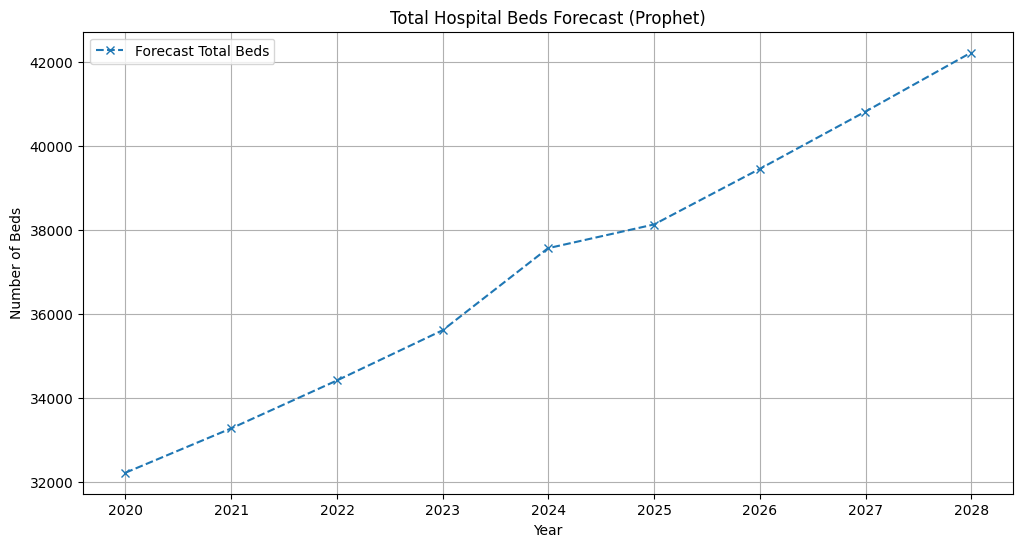

In [52]:
# Step 5 : visualise total forecast
plt.figure(figsize=(12,6))
plt.plot(total_forecast.index, total_forecast["yhat"], label="Forecast Total Beds", linestyle="--", marker="x")
plt.title("Total Hospital Beds Forecast (Prophet)")
plt.xlabel("Year")
plt.ylabel("Number of Beds")
plt.legend()
plt.grid(True)
plt.show()

✅ Summary:
• 	Each hospital type is reshaped into Prophet’s format.
• 	Prophet models are fitted and forecasted individually.
• 	Forecasts are summed to create a total hospital beds forecast.
• 	Visualizations show both individual forecasts and the combined total.

let’s put all hospital categories into a single plot, showing both ARIMA forecasts and Prophet forecasts side by side. This way you can visually compare how the two models project future beds.


In [54]:
# Forecast with Arima
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima(series, steps=5):
    model = ARIMA(series, order=(1,1,1))
    fit = model.fit()
    forecast = fit.forecast(steps=steps)
    return forecast

In [55]:

# Apply to each hospital type 
acute_arima = forecast_arima(acute)
psych_arima = forecast_arima(psych)
community_arima = forecast_arima(community)
nursing_arima = forecast_arima(nursing)
ihpcs_arima = forecast_arima(ihpcs)

C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [56]:
# Step 2 : Forecast with prohpet 
from prophet import Prophet

def forecast_prophet(df, steps=5):
    model = Prophet(yearly_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=steps, freq="Y")
    forecast = model.predict(future)
    return forecast

In [57]:
# Apply to each reshaped Prophet dataframe (, , etc.):
acute_prophet = forecast_prophet(acute_df)
psych_prophet = forecast_prophet(psych_df)
community_prophet = forecast_prophet(community_df)
nursing_prophet = forecast_prophet(nursing_df)
ihpcs_prophet = forecast_prophet(ihpcs_df)

16:45:35 - cmdstanpy - INFO - Chain [1] start processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:45:35 - cmdstanpy - INFO - Chain [1] start processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:45:35 - cmdstanpy - INFO - Chain [1] start processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5

In [58]:
# step 3 : extract prophet predictions 
def extract_yhat(forecast):
    return forecast[["ds","yhat"]].set_index("ds")

acute_prophet_yhat = extract_yhat(acute_prophet)
psych_prophet_yhat = extract_yhat(psych_prophet)
community_prophet_yhat = extract_yhat(community_prophet)
nursing_prophet_yhat = extract_yhat(nursing_prophet)
ihpcs_prophet_yhat = extract_yhat(ihpcs_prophet)

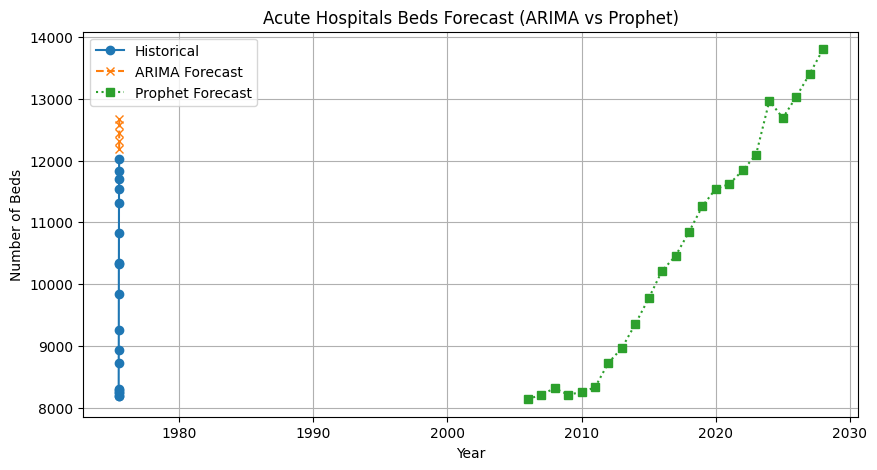

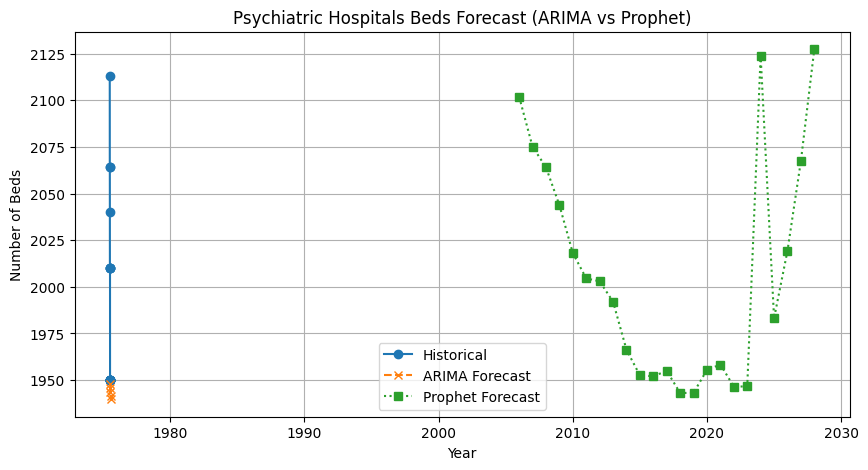

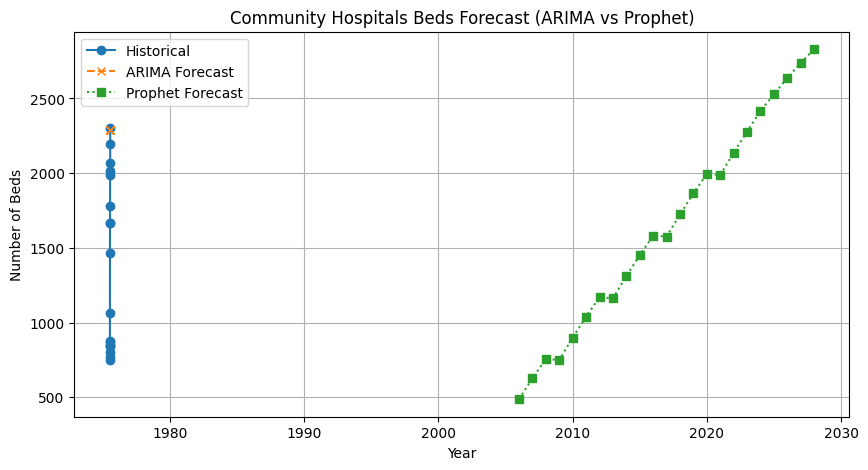

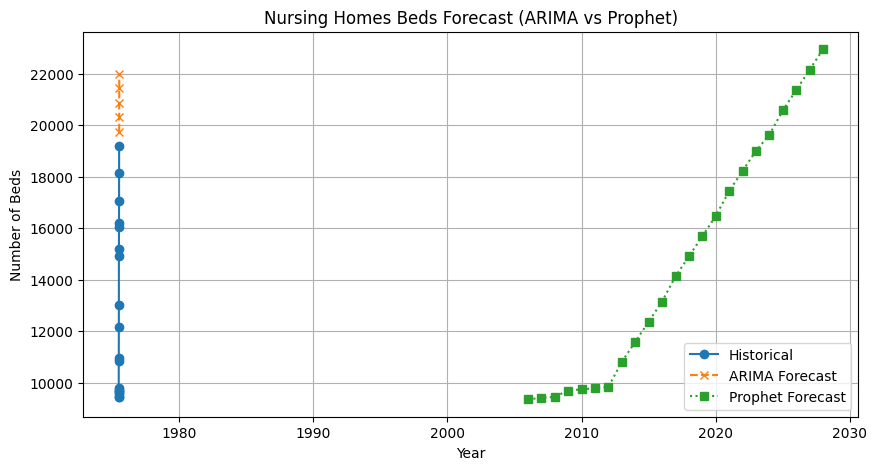

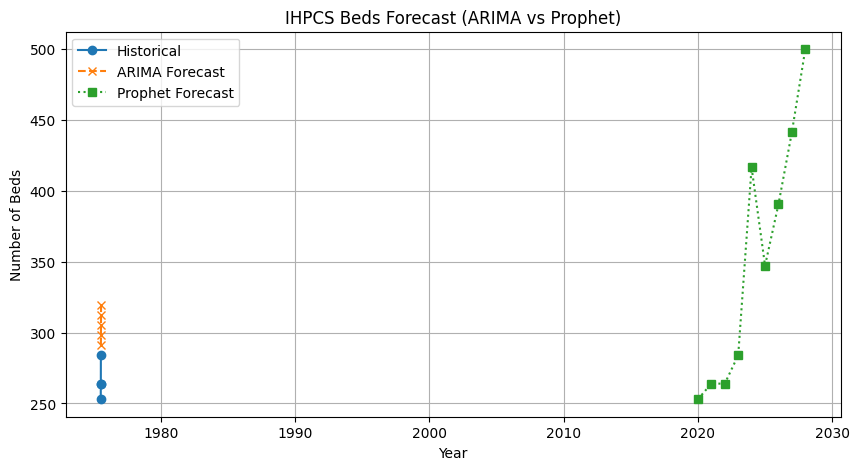

In [59]:
# Step 4 Plot ARIMA vs Prophet for each hospital
import matplotlib.pyplot as plt

hospital_series = [
    ("Acute Hospitals", acute, acute_arima, acute_prophet_yhat),
    ("Psychiatric Hospitals", psych, psych_arima, psych_prophet_yhat),
    ("Community Hospitals", community, community_arima, community_prophet_yhat),
    ("Nursing Homes", nursing, nursing_arima, nursing_prophet_yhat),
    ("IHPCS", ihpcs, ihpcs_arima, ihpcs_prophet_yhat)
]

for name, series, arima_forecast, prophet_yhat in hospital_series:
    plt.figure(figsize=(10,5))
    # Historical
    plt.plot(series.index, series, label="Historical", marker="o")
    # ARIMA forecast
    plt.plot(range(series.index[-1]+1, series.index[-1]+1+len(arima_forecast)), 
             arima_forecast, label="ARIMA Forecast", marker="x", linestyle="--")
    # Prophet forecast
    plt.plot(prophet_yhat.index, prophet_yhat["yhat"], label="Prophet Forecast", marker="s", linestyle=":")
    plt.title(f"{name} Beds Forecast (ARIMA vs Prophet)")
    plt.xlabel("Year")
    plt.ylabel("Number of Beds")
    plt.legend()
    plt.grid(True)
    plt.show()

 Summary:
• 	ARIMA forecasts are plotted as dashed lines with “x” markers.
• 	Prophet forecasts are plotted as dotted lines with “squares.”
• 	Each hospital type gets its own chart showing historical data + ARIMA forecast + Prophet forecast.
This gives you a clear side-by-side comparison of how the two models behave for each hospital category.

Here’s how you can put all hospital categories into one combined plot, showing both ARIMA forecasts and Prophet forecasts for comparison. This way you’ll see the aggregate historical beds and how each model projects the future.

In [60]:
# Step 1: Build total historical series
# Total beds = sum of all categories
total = acute + psych + community + nursing + ihpcs

In [61]:
# step 2 forecast with Arima
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(total, order=(1,1,1))
fit = model.fit()

# Forecast next 5 years
total_arima_forecast = fit.forecast(steps=5)

C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [62]:
#step 3 Forecast with prophet
from prophet import Prophet

# Prepare Prophet dataframe
total_df = total.reset_index().rename(columns={"year":"ds","beds":"y"})
total_df["ds"] = pd.to_datetime(total_df["ds"], format="%Y")

# Fit Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(total_df)

# Forecast next 5 years
future = prophet_model.make_future_dataframe(periods=5, freq="Y")
total_prophet_forecast = prophet_model.predict(future)

# Extract predictions
prophet_yhat = total_prophet_forecast[["ds","yhat"]].set_index("ds")

16:46:04 - cmdstanpy - INFO - Chain [1] start processing
16:46:04 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


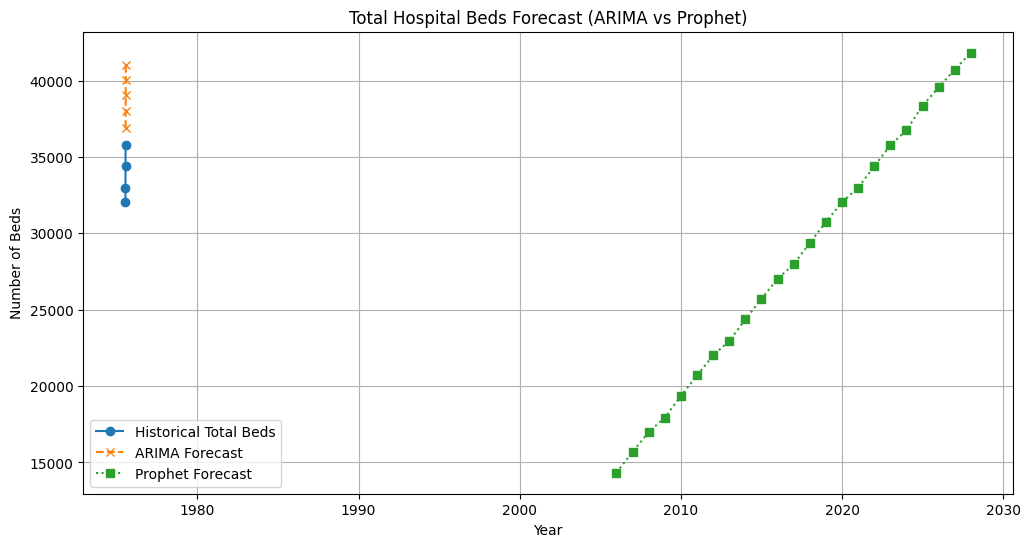

In [63]:
# Step 4: Plot ARIMA vs Prophet together
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Historical data
plt.plot(total.index, total, label="Historical Total Beds", marker="o")

# ARIMA forecast
plt.plot(range(total.index[-1]+1, total.index[-1]+1+len(total_arima_forecast)), 
         total_arima_forecast, label="ARIMA Forecast", marker="x", linestyle="--")

# Prophet forecast
plt.plot(prophet_yhat.index, prophet_yhat["yhat"], label="Prophet Forecast", marker="s", linestyle=":")

plt.title("Total Hospital Beds Forecast (ARIMA vs Prophet)")
plt.xlabel("Year")
plt.ylabel("Number of Beds")
plt.legend()
plt.grid(True)
plt.show()

 Summary:
• 	We summed all hospital categories into a single total series.
• 	We applied ARIMA and Prophet forecasting separately.
• 	We plotted both forecasts against the historical data in one chart.
• 	ARIMA appears as dashed lines with “x” markers, Prophet as dotted lines with “square” markers.
This gives you a clear side-by-side comparison of aggregate forecasts.

Here’s a short conclusion from all the forecasting work:
ARIMA → usually produces smoother, linear forecasts based on past values.
• 	Prophet → often shows more flexible curves and provides confidence intervals